<h1 align="center"> Series and DataFrame </h1>

## Series <br>
A Series is a one-dimensional array-like object containing an array of data (of any NumPy data type) and an associated array of data labels, called its index

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
List=[-5, 7, -5, 3]
Index=['a','b','c','d']
obj= pd.Series(List,Index)
obj


a   -5
b    7
c   -5
d    3
dtype: int64

In [3]:
print(obj.index)
print(obj.index.is_unique) 
print(obj.values)
print(type(obj))
print(obj)
print(obj[2])
print(obj[['a','c']])


Index(['a', 'b', 'c', 'd'], dtype='object')
True
[-5  7 -5  3]
<class 'pandas.core.series.Series'>
a   -5
b    7
c   -5
d    3
dtype: int64
-5
a   -5
c   -5
dtype: int64


In [5]:
obj[obj<0]=0
# obj['a':'c']=7
# obj['b','c']=-2
print(obj[obj>4])
print(obj*2)
print('b' in obj)
print('k' in obj)


a    7
b    7
c    7
dtype: int64
a    14
b    14
c    14
d     6
dtype: int64
True
False


float64
[-4.  3.  7.]
count    5.000000
mean     4.000000
std      4.795832
min     -4.000000
25%      3.000000
50%      7.000000
75%      7.000000
max      7.000000
dtype: float64
7.0 -4.0 4.0 4.795831523312719
e    False
d    False
c    False
b    False
a    False
dtype: bool
e    True
d    True
c    True
b    True
a    True
dtype: bool
AxesSubplot(0.125,0.11;0.775x0.77)


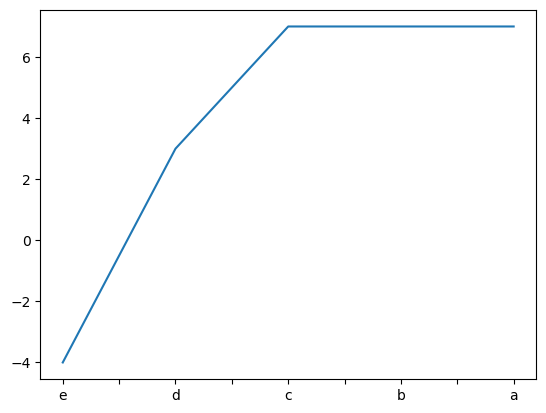

In [6]:
obj=obj.reindex(['e','d','c','b','a'],fill_value=-4.0)
print(obj.dtypes)
print(obj.unique())
print(obj.describe())
print(obj.max(), obj.min(), obj.mean(), obj.std())
print(pd.isnull(obj)); print(obj.notnull())
print(obj.plot())


## DataFrame

In [14]:
import pandas as pd 
import numpy as np
data = {'name':                   ['Amazon', 'Facebook', 'Google','Alphabet'],
        'date':       ['2001-12-01', '2012-02-10', '2010-04-09','2011-05-10'],  
        'shares':                                           [100, 30, 90, np.nan],
        'price(Million $)':                           [12.3, 10.3, 32.2,10.5]
        }

df1=pd.DataFrame(data)


df1.index=['I','II','III','IV']                     # To change the names of the row index from default values of 0,1,2...
df1['ceo']=['Jeff','Mark','Sundar','Sundar']        # df['column_head']=['arg1','arg2',....] = To add a new column 
df1=df1.append({'name':'Apple','ceo':'Tim'},ignore_index=True)  #To add a new row
df1['email']=df1['ceo']+'@'+df1['name']+'.com'      # Making a new column using previously existing columns
df1=df1.set_index(['name'])                         # Name of companies will be used as indices
df1['debt']=16.5                                    # Assigns debt of all companies =16.5
del df1['debt']                                     # Deletes the debt column
df1=df1.drop('date',axis=1)                         # df.drop('column_name ',axix=1)=To delete a column axis=1 for columns
df1=df1.drop('Alphabet')#,axis=0)                   # df.drop('Row_name')=delete a row | df.drop(['r1',r2])=delete 1+ rows
                                                        # df.drop(index=Number) to  drop a row when index is in numbers
filt=df1['ceo']=='Mark'
df1=df1.drop(index=df1[filt].index)                 # To delete a row that has its ceo name = Mark

df1


,shares,price(Million $),ceo,email
name,,,,
Amazon,100.0,12.3,Jeff,Jeff@Amazon.com
Google,90.0,32.2,Sundar,Sundar@Google.com
Apple,NaN,NaN,Tim,Tim@Apple.com


In [15]:
Data={
    'name':['Tata', None ,'Flipkart'],
    'shares':[75,80,np.nan],
    'price(Million $)':[9.2,'NA',5.4],
    'ceo':['Ratan','Ambani','Bansal'],
     'email': ['TATA.org','Ril.in','flipkart.com']
    
}

df2=pd.DataFrame(Data)
df2.loc[1,'ceo']='Mukesh'                          # editing an element of the table
df2=df2.set_index(['name'])
df2=df2.sort_index()                               #Sorts the Row names alphabetically (A to Z)
df2=df2.sort_index(axis=0,ascending=False)         # Reverse alphabetical sort (Z to A) : Axis=0 for rows(Default)
df2=df2.sort_index(axis=1)                         # A to Z type sorting of column names
df2

,ceo,email,price(Million $),shares
name,,,,
Tata,Ratan,TATA.org,9.2,75.0
Flipkart,Bansal,flipkart.com,5.4,NaN
None,Mukesh,Ril.in,NA,80.0
